In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
print(f'pandas as version: {pd.__version__}')
print(f'seaborn as sns: {sns.__version__}')

pandas as version: 1.4.4
seaborn as sns: 0.11.2


In [7]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbinsCluster.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   cluster            70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [10]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [11]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Total Fat (g)'}>,
        <AxesSubplot:title={'center':'Trans Fat (g)'}>,
        <AxesSubplot:title={'center':'Carbohydrates (g)'}>,
        <AxesSubplot:title={'center':'Sugars (g)'}>,
        <AxesSubplot:title={'center':'Protein (g)'}>]], dtype=object)

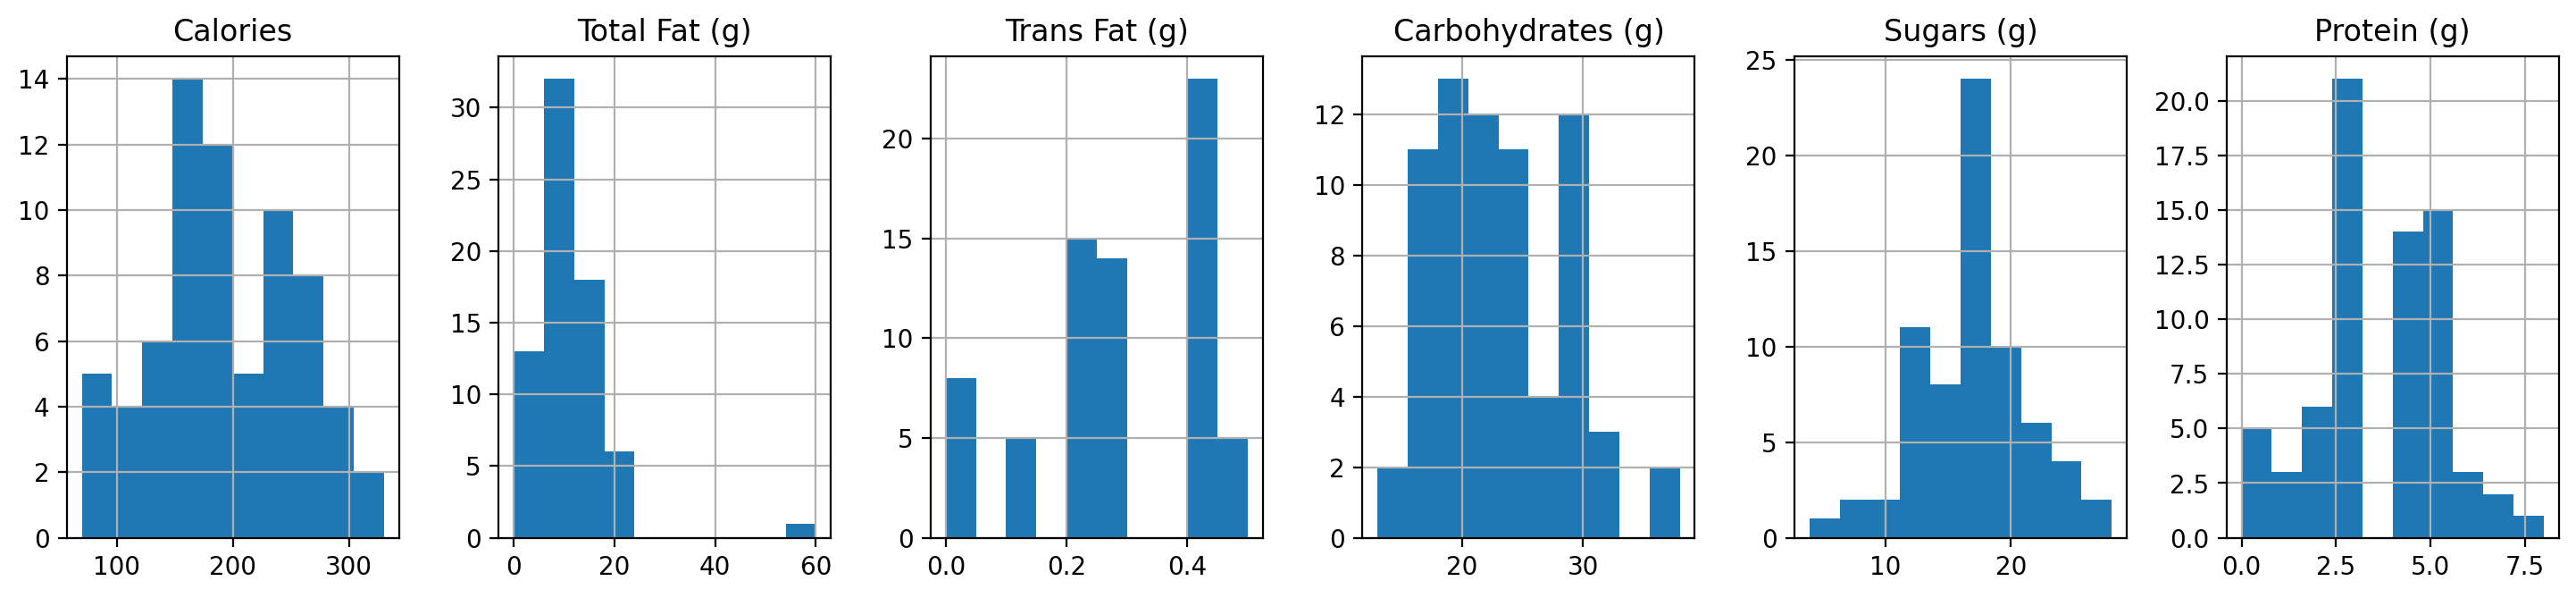

In [21]:
df[cols].hist(layout=(1,len(cols)),figsize=(3*len(cols),3.5))

<AxesSubplot:>

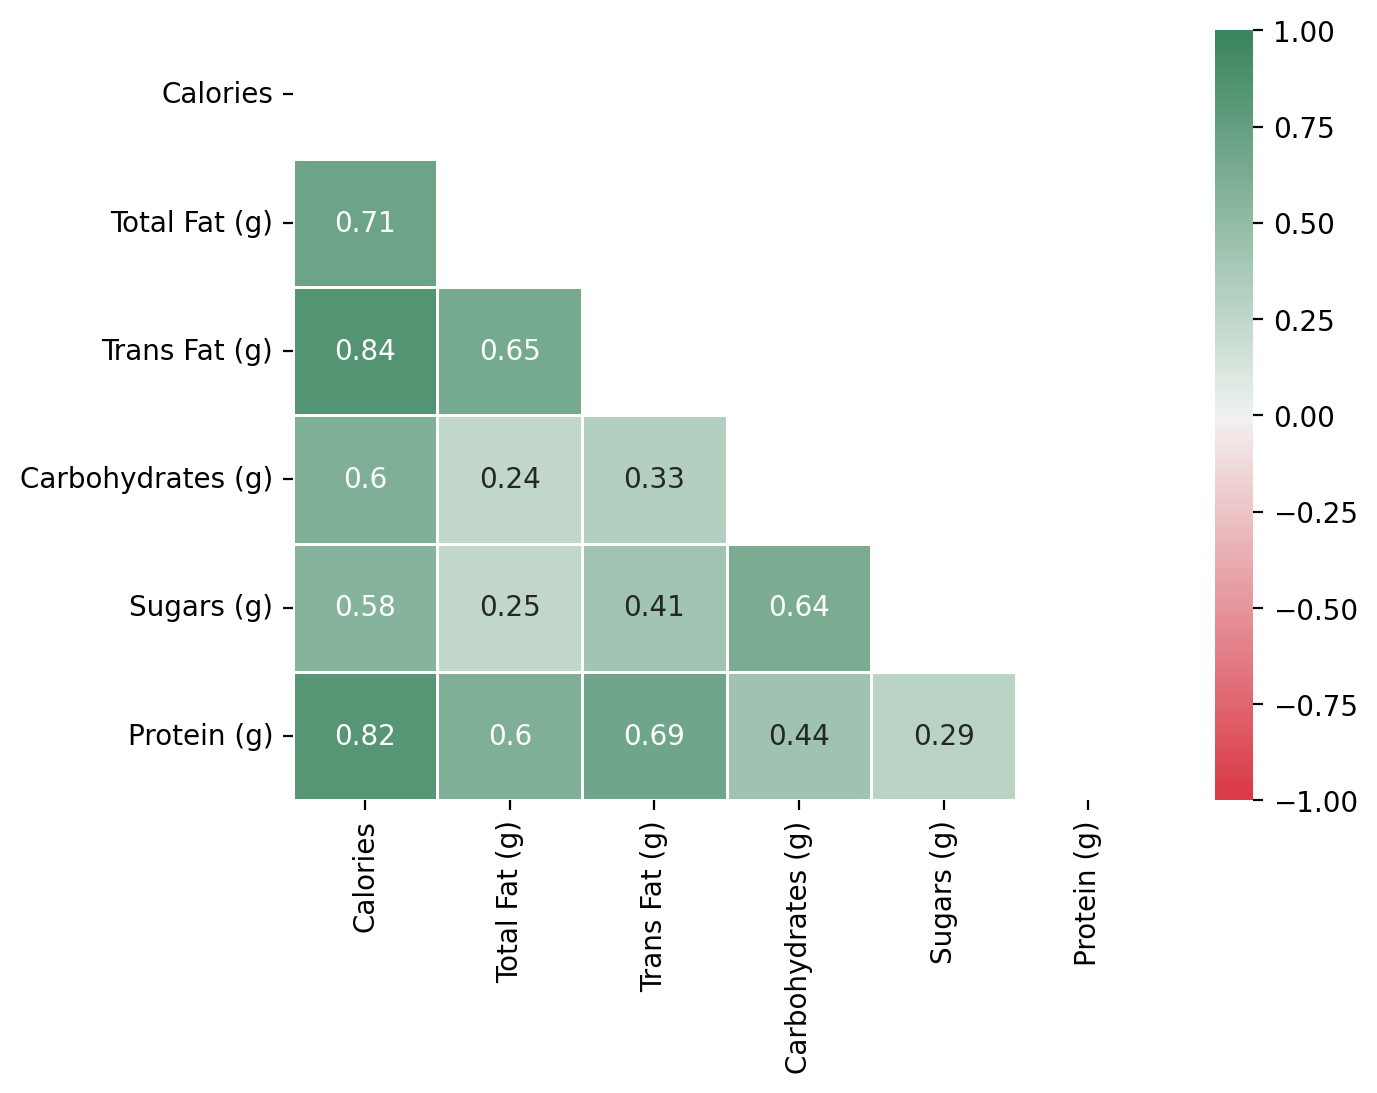

In [37]:
dcorr = df[cols].corr()

mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(7,5))
sns.heatmap(dcorr,cmap=sns.diverging_palette(10,145,n=100),vmin=-1,vmax=1,center=0,linewidths=1,annot=True,mask=mask,ax=ax)

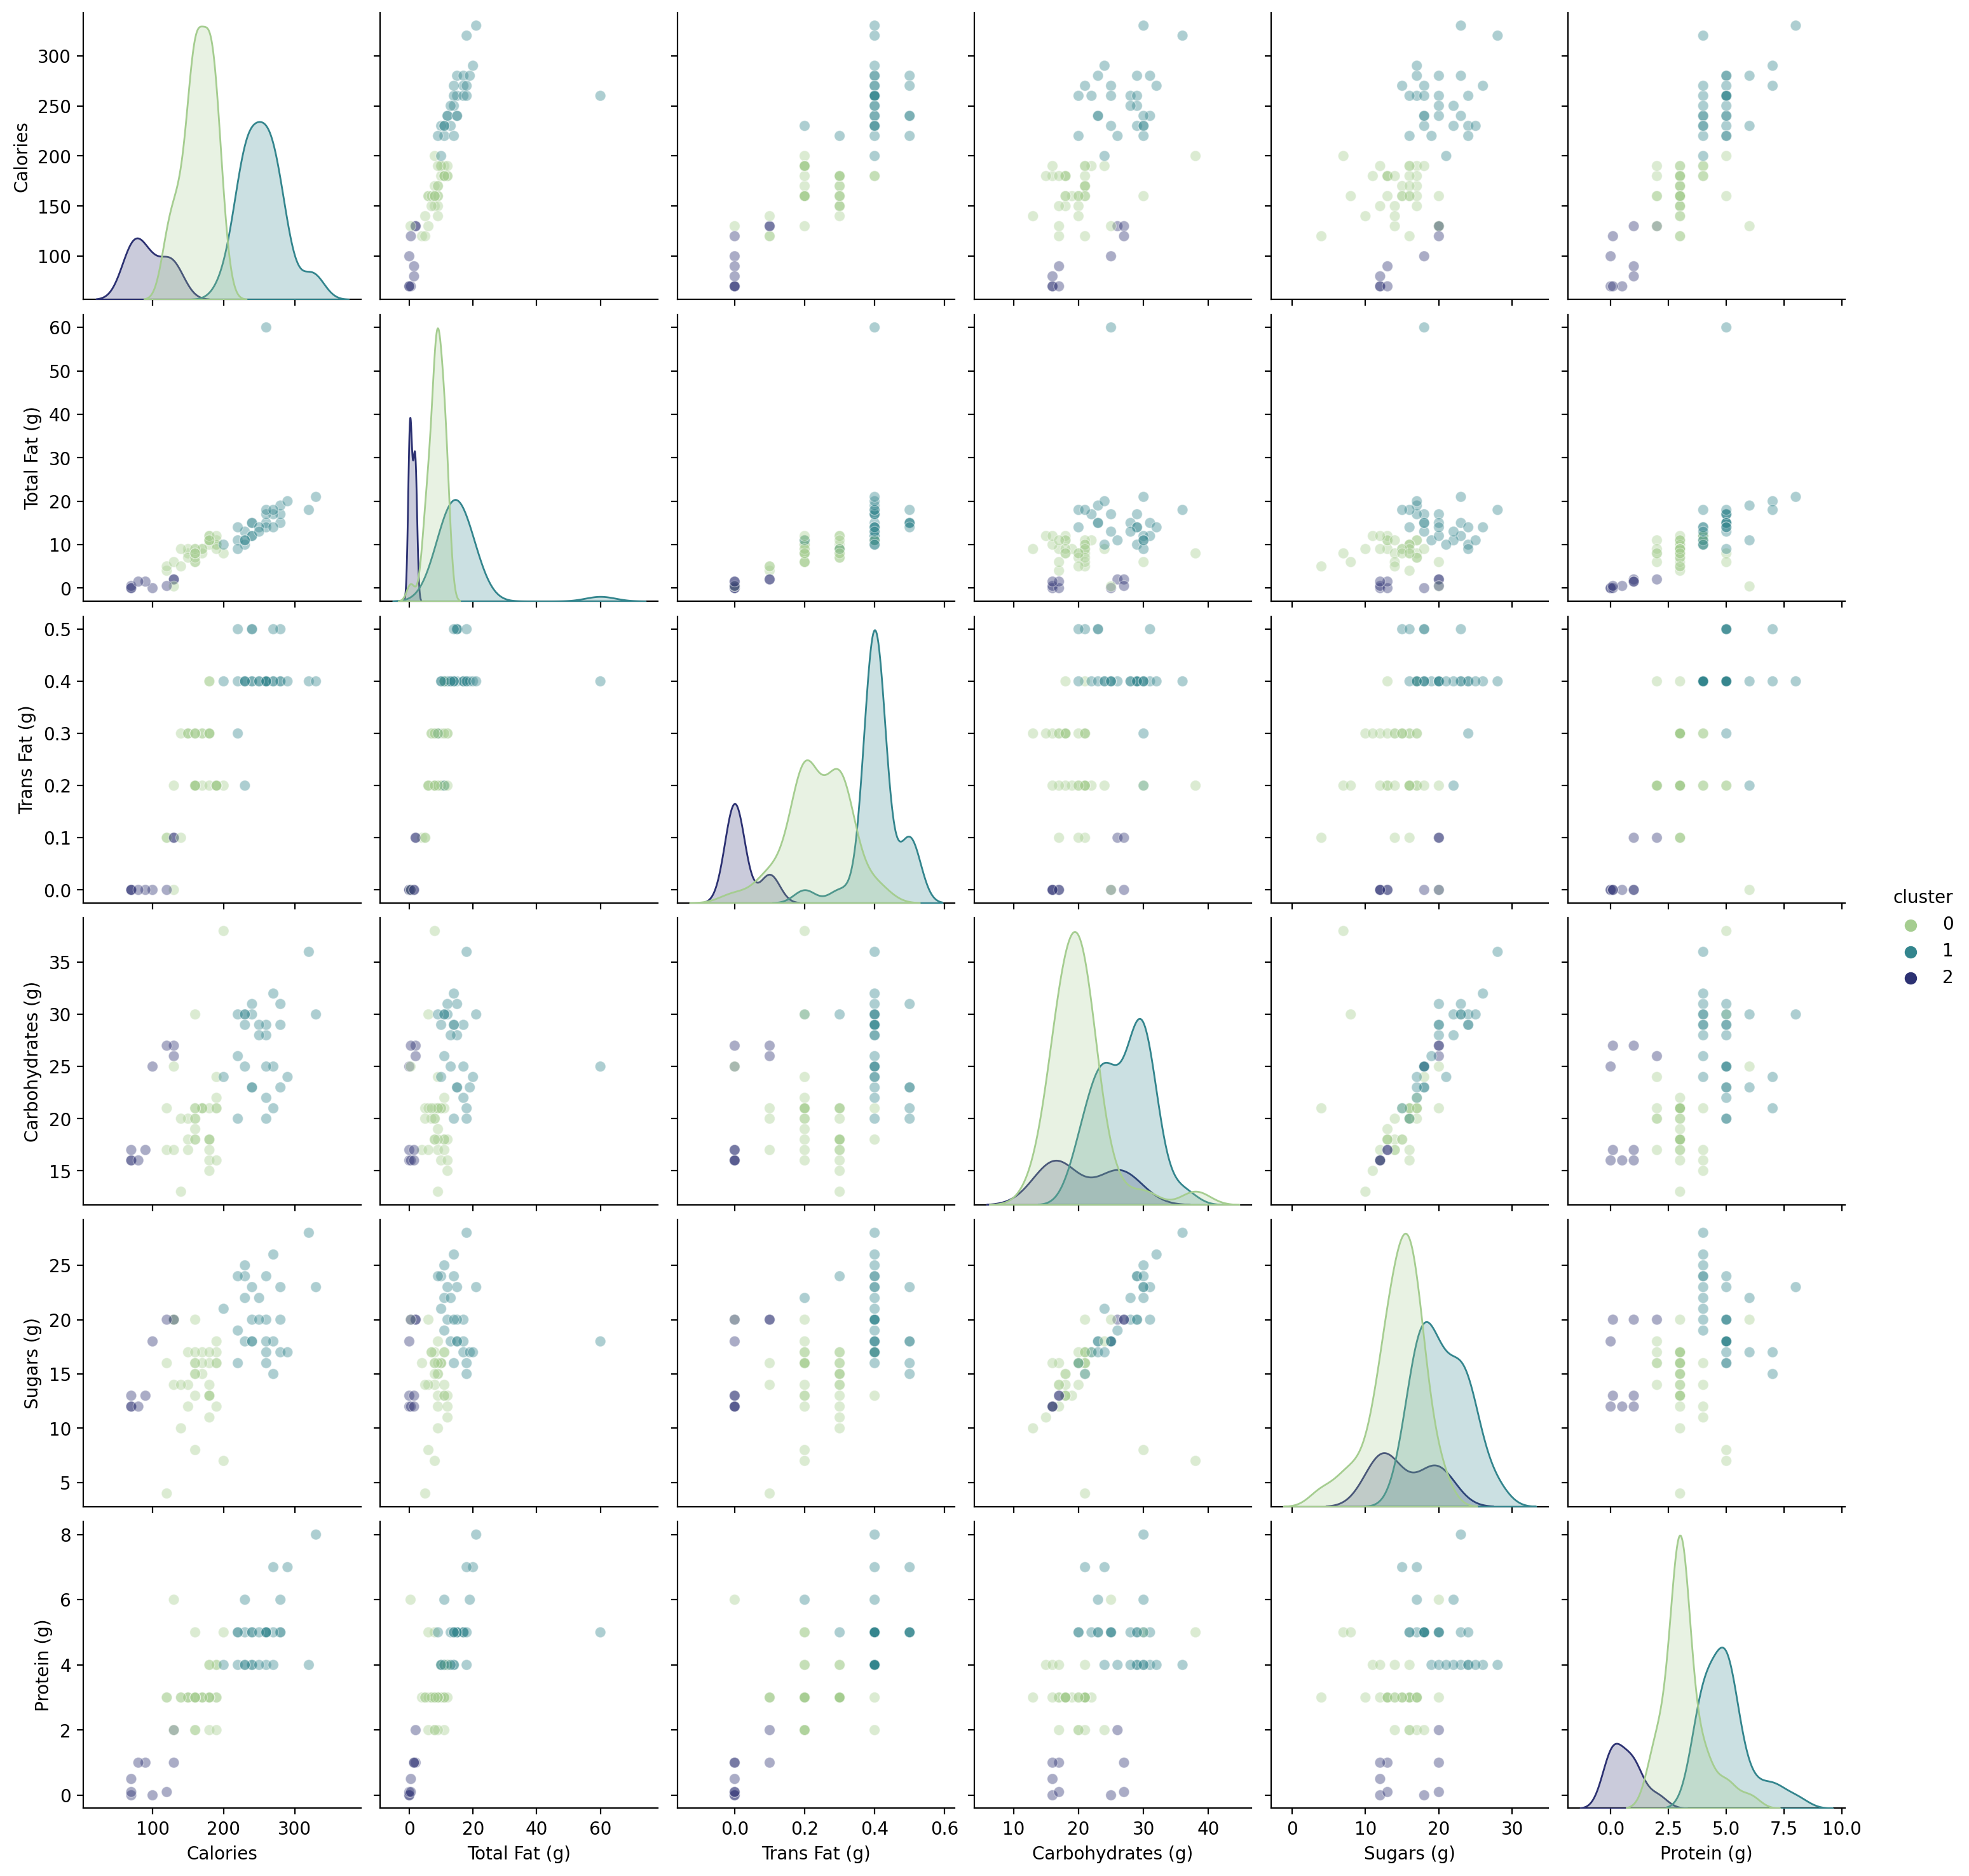

In [41]:
sns.pairplot(df,vars=cols,hue='cluster',plot_kws={'alpha':.4},palette='crest')

# PCA

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X = scaler.fit_transform(df[cols])

In [44]:
X[:5].round(4)

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])